In [150]:
import pandas as pd
import os
import PyPDF2 as p
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

### LOADING IN THE DATA

In [151]:
file_location = ('/Users/ankitkothari/Documents/COMPLETED_PROJECTS/H1B_data_analysis/h1b_dump_data/')
os.chdir(file_location)
data=pd.DataFrame()
for i, k in enumerate(os.listdir('.')):
    if k.endswith('.csv'):
        df= pd.DataFrame(pd.read_csv(k))
        data = pd.concat([df, data])
total_time=0
data=data.drop(columns=['Tax ID'])

### BASELINE DATA USAGE

In [152]:
print(f' columns {data.columns}')
print(f'data types {data.info(memory_usage="deep")}')
print(f' Memory usage in MB \n {data.memory_usage(deep=True).sort_values()/(1024*1024)}')
baseline_columns = [col for col in data.columns]
baseline_usage = [round(data[col].memory_usage(deep=True)/(1024*1024),0) for col in data.columns]

 columns Index(['Fiscal Year', 'Employer', 'Initial Approvals', 'Initial Denials',
       'Continuing Approvals', 'Continuing Denials', 'NAICS', 'State', 'City',
       'ZIP'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 585744 entries, 0 to 48543
Data columns (total 10 columns):
Fiscal Year             585744 non-null int64
Employer                585576 non-null object
Initial Approvals       585744 non-null object
Initial Denials         585744 non-null object
Continuing Approvals    585744 non-null object
Continuing Denials      585744 non-null object
NAICS                   585744 non-null int64
State                   585581 non-null object
City                    585720 non-null object
ZIP                     585596 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 247.3 MB
data types None
 Memory usage in MB 
 Index                    4.468872
Fiscal Year              4.468872
NAICS                    4.468872
ZIP                

### OPTIMIZING COLUMNS

In [153]:
data_preprocessing_start_time=time.time()

category_columns=['State','City']
string_columns=['Initial Approvals','Initial Denials','Continuing Approvals','Continuing Denials']
int_columns=data.select_dtypes(include=['int']).columns
print(int_columns)

Index(['Fiscal Year', 'NAICS'], dtype='object')


### OPTIMIZING INT

In [154]:
for col in int_columns:
  data[col] = pd.to_numeric(data[col],errors='coerce', downcast='integer')
  print(f'Optimized Memory use in column name {col} in Category Data type  {col} {data[col].memory_usage(deep=True)/(1024 ** 2):03.2f} MB')


Optimized Memory use in column name Fiscal Year in Category Data type  Fiscal Year 5.59 MB
Optimized Memory use in column name NAICS in Category Data type  NAICS 5.03 MB


### OPTIMIZING OBJECT COLUMNS

In [155]:
for col in category_columns:
    num_unique_values = len(data[col].unique())
    num_total_values = len(data[col])
    if num_unique_values / num_total_values < 0.5:
        start= time.time()
        data[col] = data[col].astype('category')
        total_time+=time.time()-start
        print(f'Optimized Memory use in column name {col} in Category Data type  {col} {data[col].memory_usage(deep=True)/(1024 ** 2):03.2f} MB')


Optimized Memory use in column name State in Category Data type  State 5.03 MB
Optimized Memory use in column name City in Category Data type  City 6.45 MB


### OPTIMIZING FLOAT

In [156]:
string_columns=['Initial Approvals','Initial Denials','Continuing Approvals','Continuing Denials']
for col in string_columns:
    num_unique_values = len(data[col].unique())
    num_total_values = len(data[col])
    #print(f'Ratio of unique values to length of  {col} is {(num_unique_values/num_total_values):03.2f}')
    print(f'Memory Use in in column name {col} Object Data type {col} {data[col].memory_usage(deep=True)/(1024 ** 2):03.2f} MB')
    if num_unique_values / num_total_values < 0.5:
        start_float= time.time()
        data[col] = pd.to_numeric(data[col],errors='coerce', downcast='float')
        total_time_float+=time.time()-start_float
        print(f'Optimized Memory use in column name {col} in Category Data type  {col} {data[col].memory_usage(deep=True)/(1024 ** 2):03.2f} MB')
data_preprocessing_optimization_time= (time.time()-data_preprocessing_start_time)/60

Memory Use in in column name Initial Approvals Object Data type Initial Approvals 41.24 MB
Optimized Memory use in column name Initial Approvals in Category Data type  Initial Approvals 6.70 MB
Memory Use in in column name Initial Denials Object Data type Initial Denials 26.44 MB
Optimized Memory use in column name Initial Denials in Category Data type  Initial Denials 6.70 MB
Memory Use in in column name Continuing Approvals Object Data type Continuing Approvals 41.18 MB
Optimized Memory use in column name Continuing Approvals in Category Data type  Continuing Approvals 6.70 MB
Memory Use in in column name Continuing Denials Object Data type Continuing Denials 24.28 MB
Optimized Memory use in column name Continuing Denials in Category Data type  Continuing Denials 6.70 MB


### TIME TAKEN FOR MEMORY OPTIMIZATION

In [157]:
print(f'Time Taken for Data Preprocessing Memory Optimization  {data_preprocessing_optimization_time:03.2f} mins')

Time Taken for Data Preprocessing Memory Optimization  0.05 mins


### OPTIMIZED MEMORY USAGE

In [158]:
print(f' Memory usage in MB \n {data.memory_usage(deep=True).sort_values()/(1024*1024)}')
print(f'data types {data.info(memory_usage="deep")}')

 Memory usage in MB 
 NAICS                    0.558609
State                    0.564369
Fiscal Year              1.117218
City                     1.982865
Initial Approvals        2.234436
Initial Denials          2.234436
Continuing Approvals     2.234436
Continuing Denials       2.234436
Index                    4.468872
ZIP                      4.468872
Employer                44.376662
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 585744 entries, 0 to 48543
Data columns (total 10 columns):
Fiscal Year             585744 non-null int16
Employer                585576 non-null object
Initial Approvals       585673 non-null float32
Initial Denials         585742 non-null float32
Continuing Approvals    585626 non-null float32
Continuing Denials      585740 non-null float32
NAICS                   585744 non-null int8
State                   585581 non-null category
City                    585720 non-null category
ZIP                     585596 non-null float64
dty

### CODES FOR COLUMNS CONVERTED TO CATEGORIES

In [159]:
d = dict(enumerate(data['State'].cat.categories))
print(d)
print(data['City'].cat.categories)

{0: '\x04', 1: 'AE', 2: 'AK', 3: 'AL', 4: 'AP', 5: 'AR', 6: 'AZ', 7: 'CA', 8: 'CO', 9: 'CT', 10: 'DC', 11: 'DE', 12: 'FL', 13: 'FM', 14: 'GA', 15: 'GU', 16: 'HI', 17: 'IA', 18: 'ID', 19: 'IL', 20: 'IN', 21: 'KS', 22: 'KY', 23: 'LA', 24: 'MA', 25: 'MD', 26: 'ME', 27: 'MI', 28: 'MN', 29: 'MO', 30: 'MP', 31: 'MS', 32: 'MT', 33: 'NC', 34: 'ND', 35: 'NE', 36: 'NH', 37: 'NJ', 38: 'NM', 39: 'NV', 40: 'NY', 41: 'OH', 42: 'OK', 43: 'OR', 44: 'PA', 45: 'PR', 46: 'RI', 47: 'SC', 48: 'SD', 49: 'TN', 50: 'TX', 51: 'UT', 52: 'VA', 53: 'VI', 54: 'VT', 55: 'WA', 56: 'WI', 57: 'WV', 58: 'WY'}
Index(['.DURHAM', 'AABBOTT PARK', 'ABBEVILLE', 'ABBINGTON', 'ABBORD PARK',
       'ABBORR PARK', 'ABBOT PARK', 'ABBOTT PARK', 'ABERDEEN', 'ABERDEN',
       ...
       'ZEBULON', 'ZEELAND', 'ZELIENOPLE', 'ZENDA', 'ZEPHYR COVE',
       'ZEPHYRHILLS', 'ZIMMERMAN', 'ZION', 'ZIONSVILLE', 'ZUNI'],
      dtype='object', length=8707)


### VISUALIZATION OF MEMORY OPTIMIZATION 

In [160]:
columns = [col for col in data.columns]
optimized_usage = [round(data[col].memory_usage(deep=True)/(1024*1024),0) for col in data.columns]

In [161]:
columns

['Fiscal Year',
 'Employer',
 'Initial Approvals',
 'Initial Denials',
 'Continuing Approvals',
 'Continuing Denials',
 'NAICS',
 'State',
 'City',
 'ZIP']

In [162]:
baseline_usage


[9.0, 49.0, 41.0, 26.0, 41.0, 24.0, 9.0, 37.0, 41.0, 9.0]

In [163]:
optimized_usage 

[6.0, 49.0, 7.0, 7.0, 7.0, 7.0, 5.0, 5.0, 6.0, 9.0]

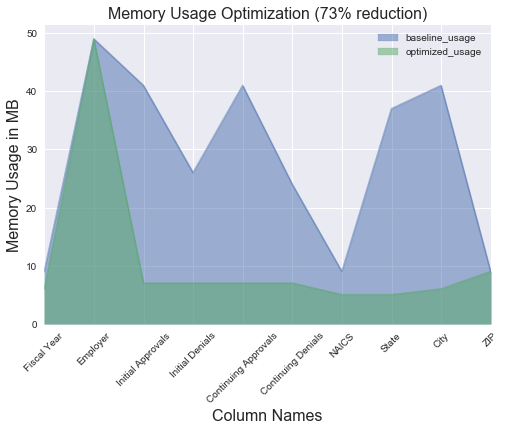

In [169]:
df = pd.DataFrame({
    'baseline_usage': baseline_usage,
    'optimized_usage': optimized_usage,
}, index=baseline_columns)
plt.style.use('seaborn')
ax = df.plot.area(stacked=False)
ax.set_xlabel('Column Names',fontsize=16)
ax.set_ylabel('Memory Usage in MB',fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Memory Usage Optimization (73% reduction)',fontsize=16)
plt.show()

In [165]:
data.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,State,City,ZIP
0,2018,REDDY GI ASSOCIATES,0.0,0.0,0.0,1.0,99,AZ,MESA,85209.0
1,2018,ADMIRAL INSTRUMENTS LLC,1.0,0.0,0.0,0.0,33,AZ,TEMPE,85281.0
2,2018,THE BELPORT COMPANY INC,0.0,1.0,0.0,0.0,33,CA,CAMARILLO,93012.0
3,2018,CALLAWAY GOLF SALES COMPANY,1.0,0.0,0.0,0.0,33,CA,CARLSBAD,92008.0
4,2018,PAYSAFE PARTNERS LP,0.0,0.0,1.0,0.0,52,CA,IRVINE,92612.0


In [166]:
data.to_csv('./optimized_h1b_data.csv')